Data Load

In [5]:
import pandas as pd

# 파일 경로 지정
file_path = r"C:\Users\준서\Desktop\준서\3-2\데과프\A4\seeds_dataset.txt"

# 공백 또는 탭을 구분자로 읽기
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# 컬럼 수 확인
print(df.shape)  # (행 수, 열 수)

# 앞부분 출력
print(df.head())

print(df.info())


(210, 8)
       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
None


In [9]:
df_cluster = df.iloc[:,:-1]
print(df_cluster.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None


C:\anacon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anacon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anacon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anacon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

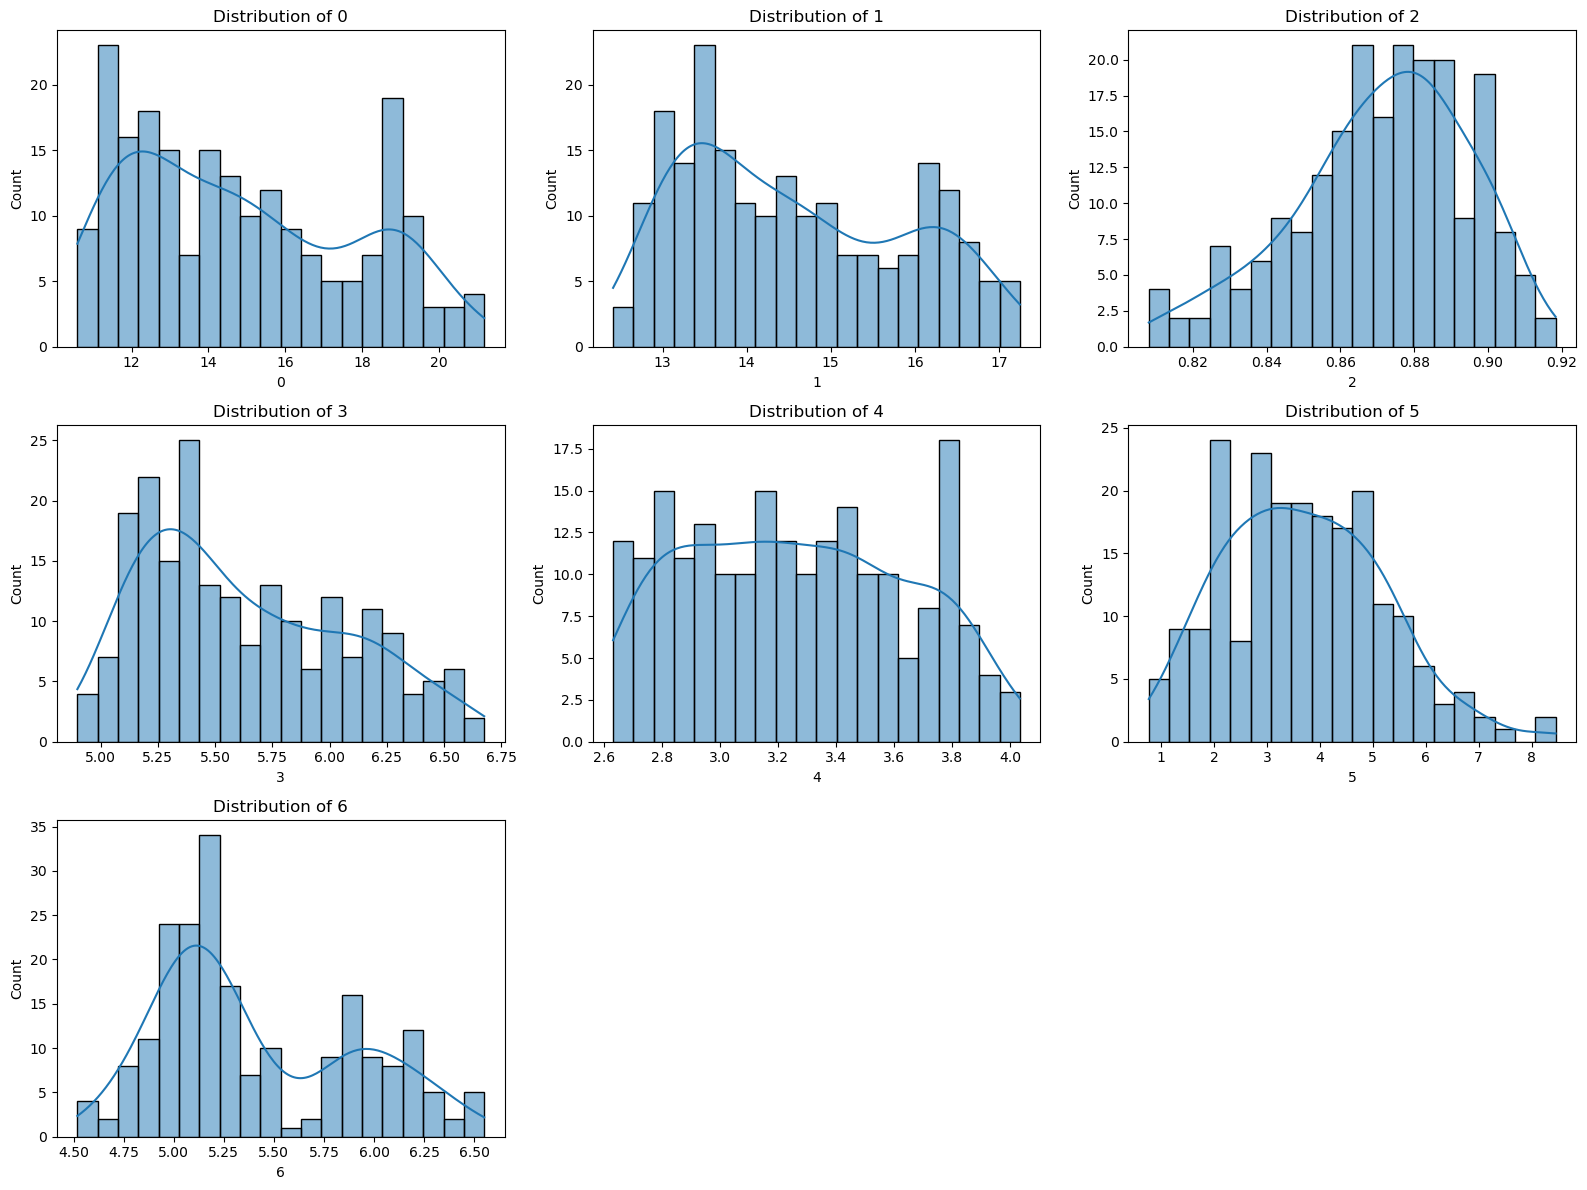

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_columns = df_cluster.columns

# 시각화 설정
plt.figure(figsize=(16, 12))
for idx, col in enumerate(feature_columns):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


Data Preprocessing

In [32]:
import warnings
warnings.filterwarnings('ignore')

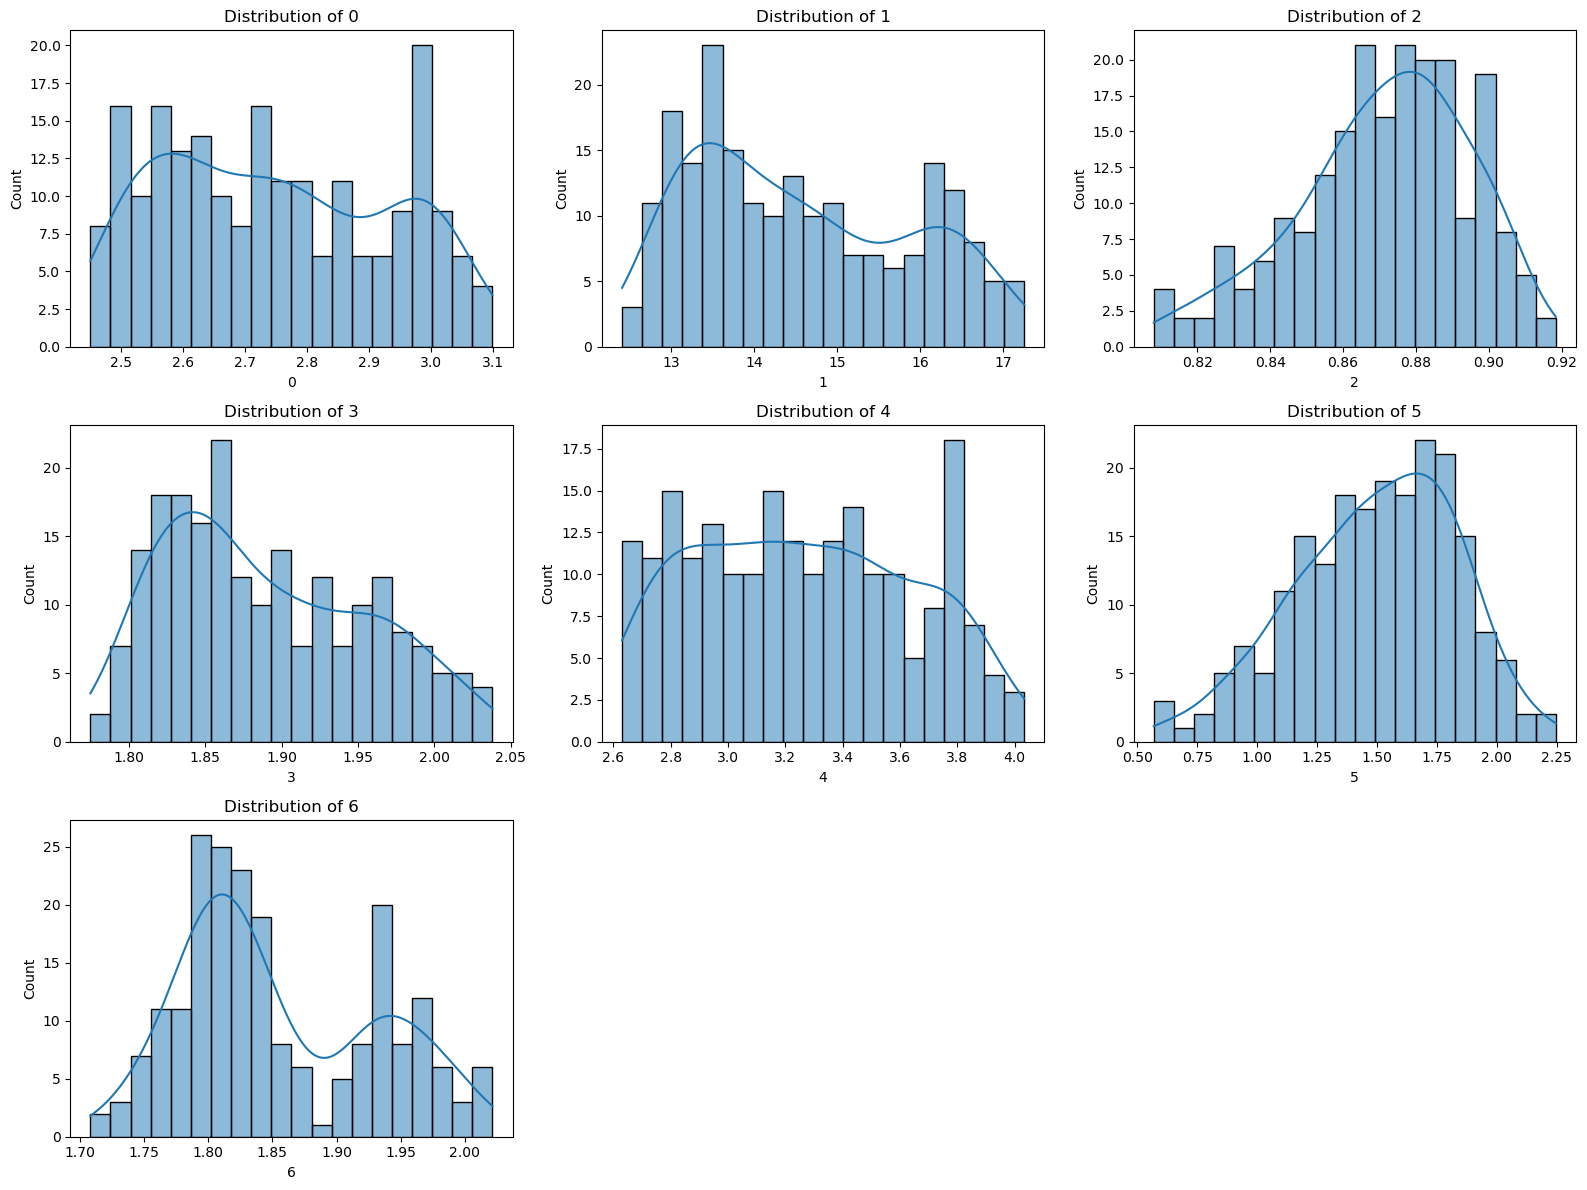

In [33]:
import numpy as np

# 로그 변환 대상: 0, 3, 5, 6
df_log = df_cluster.copy()
for col in [0, 3, 5, 6]:
    df_log[col] = np.log1p(df_log[col])  # log(x + 1)

plt.figure(figsize=(16, 12))
for idx, col in enumerate(df_log.columns):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df_log[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [34]:
df_log

,0,1,2,3,4,5,6
0,2.788708,14.84,0.8710,1.911467,3.312,1.169692,1.827770
1,2.765060,14.57,0.8811,1.880076,3.333,0.702107,1.784399
2,2.727199,14.09,0.9050,1.839120,3.337,1.308063,1.762159
3,2.697326,13.94,0.8955,1.844352,3.379,1.181420,1.758720
4,2.841415,14.99,0.9034,1.895819,3.562,0.856541,1.820509
...,...,...,...,...,...,...,...
205,2.579459,13.20,0.8783,1.814336,2.981,1.532773,1.769855
206,2.503892,12.88,0.8511,1.814825,2.795,1.672413,1.792259
207,2.653242,13.66,0.8883,1.830339,3.232,2.231626,1.801050
208,2.552565,13.21,0.8521,1.820509,2.836,1.525621,1.799066


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform( df_log.iloc[:])

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # 전체 분산의 95%를 설명하는 주성분만
X_pca = pca.fit_transform(X_scaled)

Training

Case1: without Data Preprocessing

In [23]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

X_raw = df_cluster.iloc[:]
y_true = df.iloc[:, -1]
k_values = range(2, 8)
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    y_pred = kmeans.fit_predict(X_raw)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append({'K': k, 'ARI(raw data)': round(ari, 4)})

results_df1 = pd.DataFrame(ari_scores)
print(results_df1)

   K  ARI(raw data)
0  2         0.4648
1  3         0.7166
2  4         0.5467
3  5         0.5600
4  6         0.4699
5  7         0.4658


Case2: with Data Preprocessing (log transform for col 0,3,5,6)

In [51]:
#log변환 한 경우 training

X_log = df_log.iloc[:]
k_values = range(2, 8)
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    y_pred = kmeans.fit_predict(X_log)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append({'K': k, 'ARI(log transform)': round(ari, 4)})

results_df2 = pd.DataFrame(ari_scores)
print(results_df2)

   K  ARI(log transform)
0  2              0.4815
1  3              0.6699
2  4              0.6197
3  5              0.4745
4  6              0.4389
5  7              0.4268


Case3: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling)

In [52]:
# scaling 한 경우 traing

k_values = range(2, 8)
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    y_pred = kmeans.fit_predict(X_scaled)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append({'K': k, 'ARI(Scaled)': round(ari, 4)})

results_df3 = pd.DataFrame(ari_scores)
print(results_df3)

   K  ARI(Scaled)
0  2       0.4805
1  3       0.7860
2  4       0.6545
3  5       0.5227
4  6       0.4717
5  7       0.3874


Case4: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Polynomial features)

In [53]:
# Polynomial features

k_values = range(2, 8)
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    y_pred = kmeans.fit_predict(X_poly)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append({'K': k, 'ARI(Poly)': round(ari, 4)})

results_df4 = pd.DataFrame(ari_scores)
print(results_df4)

   K  ARI(Poly)
0  2     0.2351
1  3     0.3490
2  4     0.3290
3  5     0.3494
4  6     0.2816
5  7     0.2401


Case5: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & feature extraction)

In [79]:
# PCA 이용하여 feature extraction

k_values = range(2, 8)
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    y_pred = kmeans.fit_predict(X_pca)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append({'K': k, 'ARI(PCA)': round(ari, 4)})

results_df = pd.DataFrame(ari_scores)
print(results_df5)

   K  ARI(PCA)
0  2    0.4805
1  3    0.7631
2  4    0.6191
3  5    0.5999
4  6    0.4745
5  7    0.4443


Case6: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Filter Method feature selection)

In [96]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from itertools import product

k_range = range(2, 8)        # 클러스터 수: 2~7
feature_range = range(2, 7)  # 선택 피처 수: 2~6

results = []
for k, n_features in product(k_range, feature_range):
    # 피처 선택
    selector = SelectKBest(mutual_info_classif, k=n_features)
    X_selected = selector.fit_transform(X_scaled, y_true)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_selected)

    # ARI 평가
    ari = adjusted_rand_score(y_true, y_pred)
    results.append({
        'Clusters_K': k,
        'Selected_Features': n_features,
        'ARI(Filter1)': round(ari, 4)
    })

# 5. 결과 정렬 및 상위 5개 출력
results_df6 = pd.DataFrame(results).sort_values(by='ARI(Filter1)', ascending=False)


# 6. 출력
print("KMeans Results with Feature Selection(mutual_info_classif):")
print(results_df6)

KMeans Results with Feature Selection(mutual_info_classif):
    Clusters_K  Selected_Features  ARI(Filter1)
9            3                  6        0.7039
5            3                  2        0.6595
7            3                  4        0.6562
8            3                  5        0.6532
6            3                  3        0.6364
13           4                  5        0.5709
12           4                  4        0.5504
18           5                  5        0.5455
14           4                  6        0.5180
3            2                  5        0.4912
4            2                  6        0.4858
11           4                  3        0.4850
1            2                  3        0.4797
10           4                  2        0.4765
0            2                  2        0.4720
17           5                  4        0.4708
2            2                  4        0.4683
16           5                  3        0.4544
23           6              

Case6-(2): with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Filter Method feature selection)

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif
from itertools import product

k_range = range(2, 8)        # 클러스터 수: 2~7
feature_range = range(2, 7)  # 선택 피처 수: 2~6

results = []
for k, n_features in product(k_range, feature_range):
    # 피처 선택
    selector = SelectKBest(f_classif, k=n_features)
    X_selected = selector.fit_transform(X_scaled, y_true)

    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_selected)

    # ARI 평가
    ari = adjusted_rand_score(y_true, y_pred)
    results.append({
        'Clusters_K': k,
        'Selected_Features': n_features,
        'ARI(Filter2)': round(ari, 4)
    })

# 5. 결과 정렬 및 상위 5개 출력
results_df62 = pd.DataFrame(results).sort_values(by='ARI(Filter2)', ascending=False)


# 6. 출력
print("KMeans Results with Feature Selection(f_classif):")
print(results_df62)

KMeans Results with Feature Selection(f_classif):
    Clusters_K  Selected_Features  ARI(Filter2)
9            3                  6        0.7039
5            3                  2        0.6595
8            3                  5        0.6532
7            3                  4        0.6527
6            3                  3        0.6364
12           4                  4        0.6178
13           4                  5        0.5709
18           5                  5        0.5455
2            2                  4        0.5183
14           4                  6        0.5180
17           5                  4        0.5127
3            2                  5        0.4912
4            2                  6        0.4858
11           4                  3        0.4850
1            2                  3        0.4797
10           4                  2        0.4765
0            2                  2        0.4720
22           6                  4        0.4650
16           5                  3     

Case7: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Wrapper Method feature selection)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from itertools import product

k_range = range(2, 8)        # 클러스터 수: 2~7
feature_range = range(2, 7)  # 선택 피처 수: 2~6

results = []
for k, n_features in product(k_range, feature_range):
    estimator = LogisticRegression()
    sfs = SequentialFeatureSelector(estimator, n_features_to_select=n_features, direction='forward')
    sfs.fit(X_scaled, y_true)

    X_wrapper = sfs.transform(X_scaled)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_wrapper)
    
    # ARI 평가
    ari = adjusted_rand_score(y_true, y_pred)
    results.append({
        'Clusters_K': k,
        'Selected_Features': n_features,
        'ARI(Wrapper)': round(ari, 4)
    })

# 5. 결과 정렬 및 출력
results_df7 = pd.DataFrame(results).sort_values(by='ARI(Wrapper)', ascending=False)


# 6. 출력
print("KMeans Results with Feature Selection(Wrapper):")
print(results_df7)

KMeans Results with Feature Selection(Wrapper):
    Clusters_K  Selected_Features  ARI(Wrapper)
9            3                  6        0.7871
8            3                  5        0.7109
13           4                  5        0.6723
7            3                  4        0.6723
14           4                  6        0.6619
6            3                  3        0.6085
18           5                  5        0.5689
5            3                  2        0.5522
17           5                  4        0.5288
15           5                  2        0.5283
12           4                  4        0.5280
16           5                  3        0.5116
19           5                  6        0.5115
0            2                  2        0.5087
1            2                  3        0.5027
2            2                  4        0.5027
3            2                  5        0.4912
4            2                  6        0.4858
23           6                  5       

Case8: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Embedded Method feature selection)

In [92]:
#Lasso 기반 피처 선택

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

k_range = range(2, 8)                  # 클러스터 수: 2 ~ 7
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1]  # Lasso alpha 값

results = []
for k, alpha in product(k_range, alpha_values):
    lasso = Lasso(alpha=alpha)
    model = lasso.fit(X_scaled, y_true)
    
    selector = SelectFromModel(model, prefit=True)
    X_embedded = selector.transform(X_scaled)
    
    if X_embedded.shape[1] == 0:
        continue
        
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_embedded)
    
    # ARI 평가
    ari = adjusted_rand_score(y_true, y_pred)
    results.append({
        'Clusters_K': k,
        'Lasso_Alpha': alpha,
        'Selected_Features': X_embedded.shape[1],
        'ARI(Embedded1)': round(ari, 4)
    })

# 5. 결과 정렬 및 출력
results_df8 = pd.DataFrame(results).sort_values(by='ARI(Embedded1)', ascending=False)


# 6. 출력
print("KMeans Results with Feature Selection(Embedded,Lasso):")
print(results_df8)

KMeans Results with Feature Selection(Embedded,Lasso):
    Clusters_K  Lasso_Alpha  Selected_Features  ARI(Embedded1)
5            3        0.001                  7          0.7860
6            3        0.005                  6          0.7521
8            3        0.050                  5          0.7412
7            3        0.010                  5          0.7412
13           4        0.050                  5          0.6699
12           4        0.010                  5          0.6699
10           4        0.001                  7          0.6545
11           4        0.005                  6          0.6261
9            3        0.100                  3          0.5712
18           5        0.050                  5          0.5705
17           5        0.010                  5          0.5705
16           5        0.005                  6          0.5662
14           4        0.100                  3          0.5353
15           5        0.001                  7          0.5227


Case8-2: with Data Preprocessing (log transform for col 0,3,5,6 & Standard Scaling & Embedded Method feature selection)

In [93]:
#Random Forest 기반 피처 선택

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

k_range = range(2, 8)                  # 클러스터 수: 2 ~ 7

results = []

for k in k_range:
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_scaled, y_true)

    selector = SelectFromModel(rf, threshold="median") 
    X_selected = selector.transform(X_scaled)

    if X_selected.shape[1] == 0:
        continue 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_selected)

    ari = adjusted_rand_score(y_true, y_pred)
    results.append({
        "Clusters_K": k,
        "Selected_Features": X_selected.shape[1],
        "ARI(Embedded2)": round(ari, 4)
    })

# 결과 정렬 및 출력
results_df82 = pd.DataFrame(results).sort_values(by='ARI(Embedded2)', ascending=False)


# 6. 출력
print("KMeans Results with Feature Selection(Embedded,RF):")
print(results_df82)

KMeans Results with Feature Selection(Embedded,RF):
   Clusters_K  Selected_Features  ARI(Embedded2)
1           3                  4          0.6527
2           4                  4          0.6178
0           2                  4          0.5183
3           5                  4          0.5127
4           6                  4          0.4650
5           7                  4          0.4158


Evaluation & 2D visualization 

In [81]:
df_merged = results_df1.merge(results_df2, on='K') \
                      .merge(results_df3, on='K') \
                      .merge(results_df4, on='K') \
                      .merge(results_df5, on='K')

# 보기 좋게 출력
print("Merged ARI Scores by K:")
display(df_merged)

Merged ARI Scores by K:


,K,ARI(raw data),ARI(log transform),ARI(Scaled),ARI(Poly),ARI(PCA)
0,2,0.4648,0.4815,0.4805,0.2351,0.4805
1,3,0.7166,0.6699,0.7860,0.3490,0.7631
2,4,0.5467,0.6197,0.6545,0.3290,0.6191
3,5,0.5600,0.4745,0.5227,0.3494,0.5999
4,6,0.4699,0.4389,0.4717,0.2816,0.4745
5,7,0.4658,0.4268,0.3874,0.2401,0.4443


In [100]:
# 각 결과에서 상위 5개 행 추출 및 인덱스 통일
top5_filter1 = results_df6[['Clusters_K', 'Selected_Features', 'ARI(Filter1)']].head(6).reset_index(drop=True)
top5_filter2 = results_df62[['Clusters_K', 'Selected_Features', 'ARI(Filter2)']].head(6).reset_index(drop=True)
top5_wrapper = results_df7[['Clusters_K', 'Selected_Features', 'ARI(Wrapper)']].head(6).reset_index(drop=True)
top5_Embedded1 = results_df8[['Clusters_K', 'Selected_Features', 'ARI(Embedded1)']].head(6).reset_index(drop=True)
top5_Embedded2 = results_df82[['Clusters_K', 'Selected_Features', 'ARI(Embedded2)']].head(6).reset_index(drop=True)

# 가로로 병합
summary_top6 = pd.concat([top5_filter1, top5_filter2, top5_wrapper,top5_Embedded1,top5_Embedded2], axis=1)

# 결과 출력
print("Top 6 Results per Feature Selection Method")
display(summary_top6)


Top 6 Results per Feature Selection Method


,Clusters_K,Selected_Features,ARI(Filter1),Clusters_K,Selected_Features,ARI(Filter2),Clusters_K,Selected_Features,ARI(Wrapper),Clusters_K,Selected_Features,ARI(Embedded1),Clusters_K,Selected_Features,ARI(Embedded2)
0,3,6,0.7039,3,6,0.7039,3,6,0.7871,3,7,0.7860,3,4,0.6527
1,3,2,0.6595,3,2,0.6595,3,5,0.7109,3,6,0.7521,4,4,0.6178
2,3,4,0.6562,3,5,0.6532,4,5,0.6723,3,5,0.7412,2,4,0.5183
3,3,5,0.6532,3,4,0.6527,3,4,0.6723,3,5,0.7412,5,4,0.5127
4,3,3,0.6364,3,3,0.6364,4,6,0.6619,4,5,0.6699,6,4,0.4650
5,4,5,0.5709,4,4,0.6178,3,3,0.6085,4,5,0.6699,7,4,0.4158


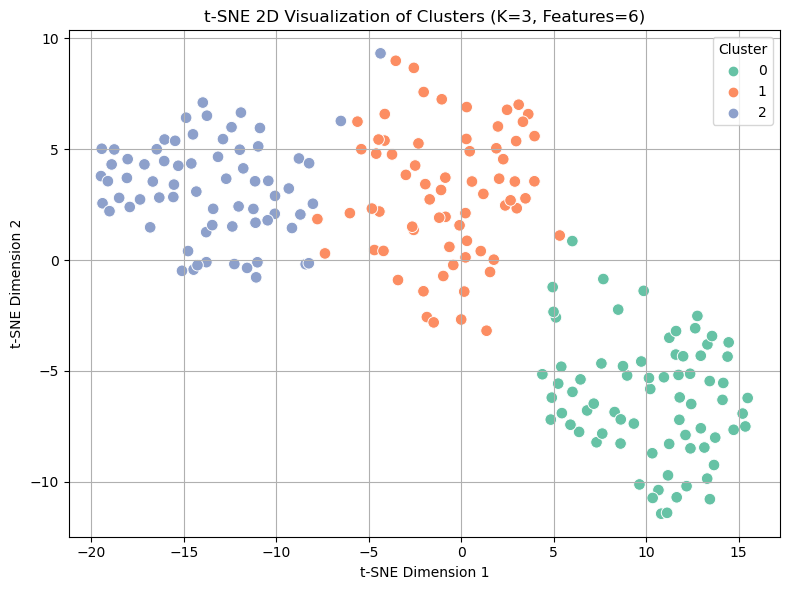

In [72]:
from sklearn.manifold import TSNE

best_k = 3
best_n_features = 6

estimator = LogisticRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=best_n_features, direction='forward')
sfs.fit(X_scaled, y_true)
X_selected = sfs.transform(X_scaled)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_selected)

# t-SNE로 2D 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_selected)

# 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='Set2', s=70)
plt.title(f"t-SNE 2D Visualization of Clusters (K={best_k}, Features={best_n_features})")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


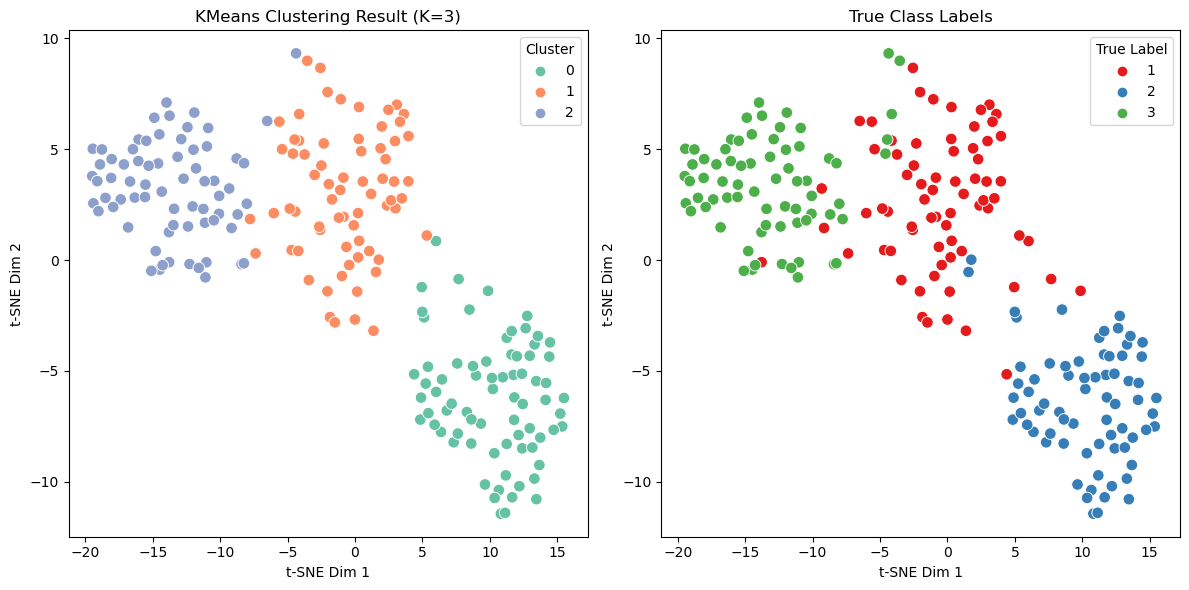

In [77]:
plt.figure(figsize=(12, 6))

# (1) KMeans 클러스터링 결과
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='Set2', s=70)
plt.title(f"KMeans Clustering Result (K={best_k})")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster")

# (2) 실제 클래스 라벨
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_true, palette='Set1', s=70)
plt.title("True Class Labels")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="True Label")

plt.tight_layout()
plt.show()
